In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

import cmcrameri.cm as cm
import utils.load_grid as lg

from proteus.utils.constants import R_earth, M_earth
from proteus.config import read_config

from proteus.plot.cpl_population import _get_mr_data
mrdata = _get_mr_data(os.environ.get("FWL_DATA"))


In [ ]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'

In [2]:
def load_grid(pgrid_dir):
    cases = lg.get_cases(pgrid_dir)
    ncases = len(cases)

    # Helpfiles
    helps, hvars = lg.load_helpfiles(cases)

    # Case numbers
    cnums = ["%d"%int(s.split("_")[-1]) for s in cases]

    # Statuses
    statuses = lg.get_statuses(pgrid_dir)

    conf = []
    for f in cases:
        conf.append( read_config(f+"/init_coupler.toml") )

    out = {
        "status": statuses,
        "cnums": cnums,
        "helps": helps,
        "hvars": hvars,
        "ncases": ncases,
        "dir": pgrid_dir,
        "conf": conf,
    }

    return out

In [3]:
lov_b = load_grid("data/output/LOV_b")
noh_b = load_grid("data/output/NOH_b")
obs_b = {
    "Demangeon+21": [[0.40, 0.16, 0.15], [0.85, 0.061, 0.047]],
    "Rajpaul+24":   [[0.47, 0.13, 0.15], []],
    "Cloutier+19":  [[1.01, 0.0,  1.01], [0.80, 0.05, 0.05 ]],
}

Helpfiles:   0%|          | 0/100 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


In [4]:
lov_c = load_grid("data/output/LOV_c")
noh_c = load_grid("data/output/NOH_c")
obs_c =  {
    "Demangeon+21": [[2.22, 0.26, 0.25], [1.385, 0.095, 0.075]],
    "Rajpaul+24":   [[2.25, 0.24, 0.25], []],
    "Luque+22":     [[2.42, 0.35, 0.34], [1.34, 0.07, 0.07]],
    "Cloutier+19":  [[2.42, 0.35, 0.34], [1.35, 0.07, 0.07 ]],
}

Helpfiles:   0%|          | 0/100 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 100/100 [00:03<00:00, 28.25it/s]


In [5]:
lov_d = load_grid("data/output/LOV_d")
noh_d = load_grid("data/output/NOH_d")
obs_d =  {
    "Demangeon+21": [[1.94, 0.28, 0.28], [1.521, 0.119, 0.098]],
    "Rajpaul+24":   [[2.14, 0.25, 0.29], []],
    "Luque+22":     [[2.31, 0.46, 0.45], [1.58, 0.08, 0.08 ]],
    "Cloutier+19":  [[2.31, 0.46, 0.45], [1.57, 0.14, 0.14]],
}

Helpfiles:  91%|█████████ | 91/100 [00:08<00:03,  2.29it/s]

Helpfiles: 100%|██████████| 100/100 [00:03<00:00, 28.45it/s]


data/output/LOV_b
    x = 0.470094 ± 4.31683e-06
    y = 0.836579 ± 0.0219637
data/output/LOV_c
    x = 2.25046 ± 2.11344e-05
    y = 1.2886 ± 0.00859978
data/output/LOV_d
    x = 2.14044 ± 2.01077e-05
    y = 1.26534 ± 0.00788249


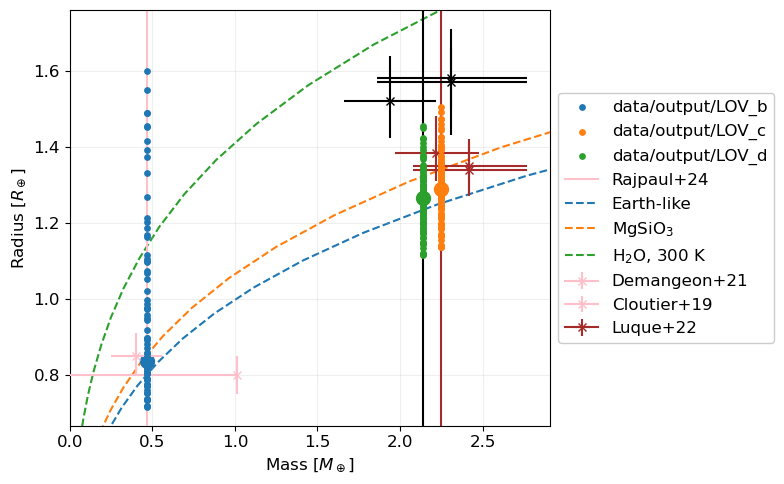

In [6]:
# parameters
jitter      = 0.025
only_done   = True
cmap        = cm.batlow
cmap.set_under('cyan')
cmap.set_over('magenta')

# make figure
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.autoscale(enable=True)
ax.set_xlabel(r"Mass [$M_\oplus$]")
ax.set_ylabel(r"Radius [$R_\oplus$]")

# plot grid
cols = ("tab:blue","tab:orange","tab:green")
for i,pl in enumerate((lov_b, lov_c, lov_d)):

    lbl   = pl["dir"]
    print(lbl)

    # get data from this grid
    hvars = pl["hvars"]
    grd_x = lg.access_hvars(hvars,"M_tot",-1) / M_earth
    grd_y = (lg.access_hvars(hvars,"z_obs",-1) + lg.access_hvars(hvars,"R_int",-1)) / R_earth
    # grd_y = lg.access_hvars(hvars,"R_int",-1) / R_earth
    stats = pl["status"]

    # only show completed cases
    plt_x = []
    plt_y = []
    for j in range(len(grd_x)):
        if 10 <= stats[j] <= 19:
            plt_x.append(grd_x[j])
            plt_y.append(grd_y[j])

    # plot results
    ax.scatter(plt_x, plt_y, label=lbl, zorder=6, s=15, marker='o', color=cols[i])

    # statistics
    med_x = np.median(grd_x)
    err_x = np.std(grd_x) / np.sqrt(len(grd_x))
    print("    x = %g ± %g"%(med_x, err_x))
    med_y = np.median(grd_y)
    err_y = np.std(grd_y) / np.sqrt(len(grd_y))
    print("    y = %g ± %g"%(med_y, err_y))
    ax.errorbar(med_x, med_y, xerr=[err_x], yerr=[err_y], color=cols[i], marker='o', markersize=10)

# Plot observations
obs_leg_vals = []
cols_obs = ("pink","brown","black")
for i,obs in enumerate((obs_b, obs_c, obs_d)):
    for k in obs.keys():
        _m = obs[k][0]
        _r = obs[k][1]
        _c = cols_obs[i]
        _l = k

        if _l in obs_leg_vals:
            _l = ""
        else:
            obs_leg_vals.append(_l)

        if len(_m)+len(_r) == 6:
            # mass and radius
            ax.errorbar(_m[0],_r[0],
                        xerr=[[_m[2]],[_m[1]]], yerr=[[_r[2]],[_r[1]]],
                        marker='x', label=_l, zorder=4, color=_c)

        elif len(_m) == 0:
            # no mass
            ax.axhline(_r[0], label=_l, c=_c)

        elif len(_r) == 0:
            # no radius
            ax.axvline(_m[0], label=_l, c=_c)

ax.set_xlim(left=0)
# ax.set_ylim(bottom=0.6, top=1.6)

# Plot reference data
ax.autoscale(enable=False)
for k in mrdata.keys():
    if '1000 K' in k:
        continue
    ax.plot(mrdata[k][0],mrdata[k][1], label=k, linestyle='dashed',zorder=0)

ax.grid(zorder=0, alpha=0.2)
ax.legend(framealpha=1.0, loc='center left', bbox_to_anchor=(1,0.5))
fig.tight_layout()
plt.show()

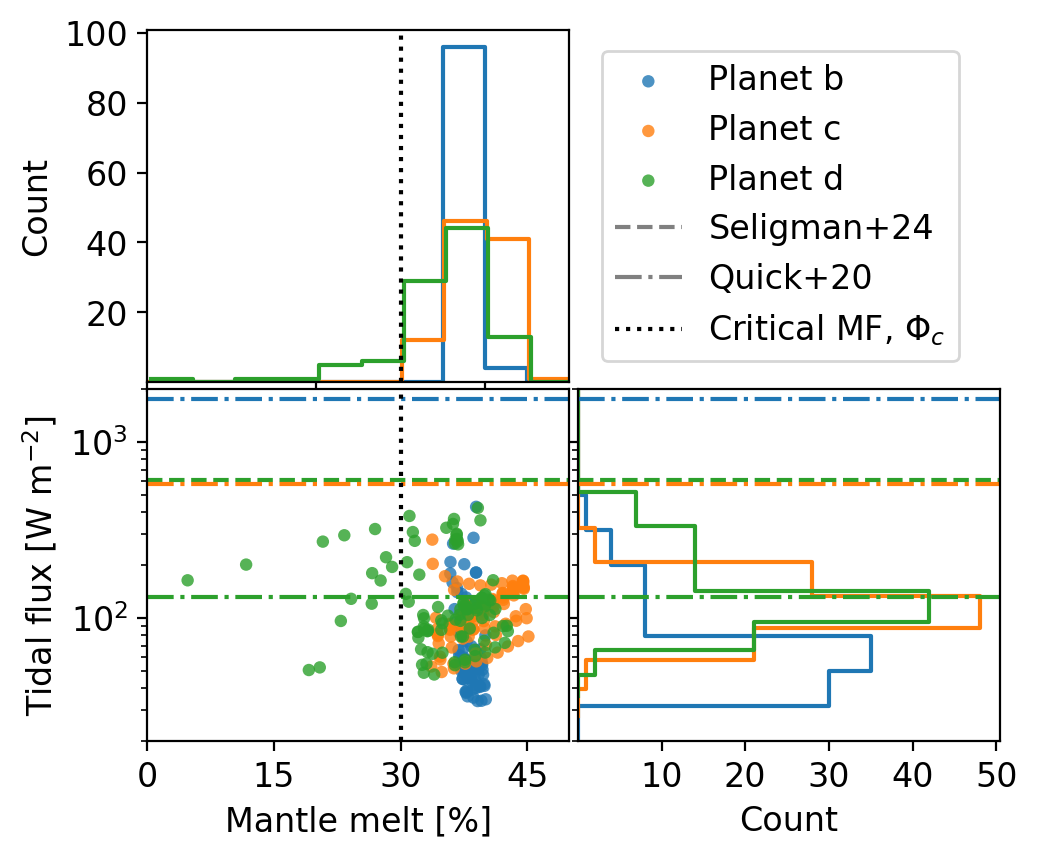

In [72]:
figscale = 1.1
fig, axs = plt.subplots(2,2, figsize=(5*figscale,4.2*figscale))
axbl = axs[1][0]
axtl = axs[0][0]
axbr = axs[1][1]
axtr = axs[0][1]
axtr.axis('off')

xkey = "Phi_global"
xlbl = "Mantle melt [%]"
xscl = 100.0
xlim = (0,50)
dx = 0.2

ykey = "F_tidal"
ylbl = r"Tidal flux [W m$^{-2}$]"
yscl = 1.0
ylim = (2e1, 2e3)
dy = 8

alpha = 0.8
nbins = 11
xbin = np.linspace(xlim[0],xlim[1],nbins)
ybin = np.logspace(np.log10(ylim[0]),np.log10(ylim[1]),nbins)

s = 20
lovs   = (lov_b,lov_c,lov_d)
nohs   = (noh_b,noh_c,noh_d)
lbls   = ("Planet b", "Planet c", "Planet d")
for i in range(len(lovs)):

    c = cols[i]

    # TIDES CASE
    pl  = lovs[i]

    hvars = pl["hvars"]
    vals_x = lg.access_hvars(hvars,xkey,-1) * xscl
    vals_y = lg.access_hvars(hvars,ykey,-1) * yscl
    axbl.scatter(vals_x, vals_y, label=lbls[i], s=s, marker='o', c=c, alpha=alpha, ec='none')

    hist = np.histogram(vals_x, bins=xbin)[0]
    axtl.step(xbin+i*dx, np.append(hist, hist[-1]), color=c, where='post')

    hist = np.histogram(vals_y, bins=ybin)[0]
    axbr.step(np.append(hist, hist[-1]), ybin+i*dy, color=c, where='pre')


axtl.set_ylabel("Count")
axtl.set_xticklabels([])
axtl.set_xlim(xlim)
axtl.set_ylim(bottom=0)
axtl.set_yticks(np.arange(20,120,20))

axbr.set_xlabel("Count")
axbr.set_yticklabels([])
axbr.set_ylim(ylim)
axbr.set_yscale("log")
axbr.set_xlim(left=0)
axbr.set_xticks(np.arange(10,60,10))
axbr.set_yticklabels([])

axbl.set_ylabel(ylbl)
axbl.set_xlabel(xlbl)
axbl.set_xlim(xlim)
axbl.set_ylim(ylim)
axbl.set_yscale("log")
axbl.set_xticks(np.arange(0,50,15))

for ax in (axbl, axbr):
    ax.axhline(-1, ls='dashed', color='grey', label="Seligman+24")
    ax.axhline(6.11e2, ls='dashed', color=cols[2])

    ax.axhline(-1,     ls='dashdot', color='grey', label="Quick+20")
    ax.axhline(1.75e3, ls='dashdot', color=cols[0])
    ax.axhline(5.77e2, ls='dashdot', color=cols[1])
    ax.axhline(1.33e2, ls='dashdot', color=cols[2])

for ax in (axtl, axbl):
    ax.axvline(30.0, color='k', ls='dotted', label=r"Critical MF, $\Phi_c$")

axbl.legend(loc='center', bbox_to_anchor=(1.5,1.52))
fig.subplots_adjust(hspace=0.02, wspace=0.02)
plt.show()
fig.savefig("output/corner.pdf",bbox_inches="tight")

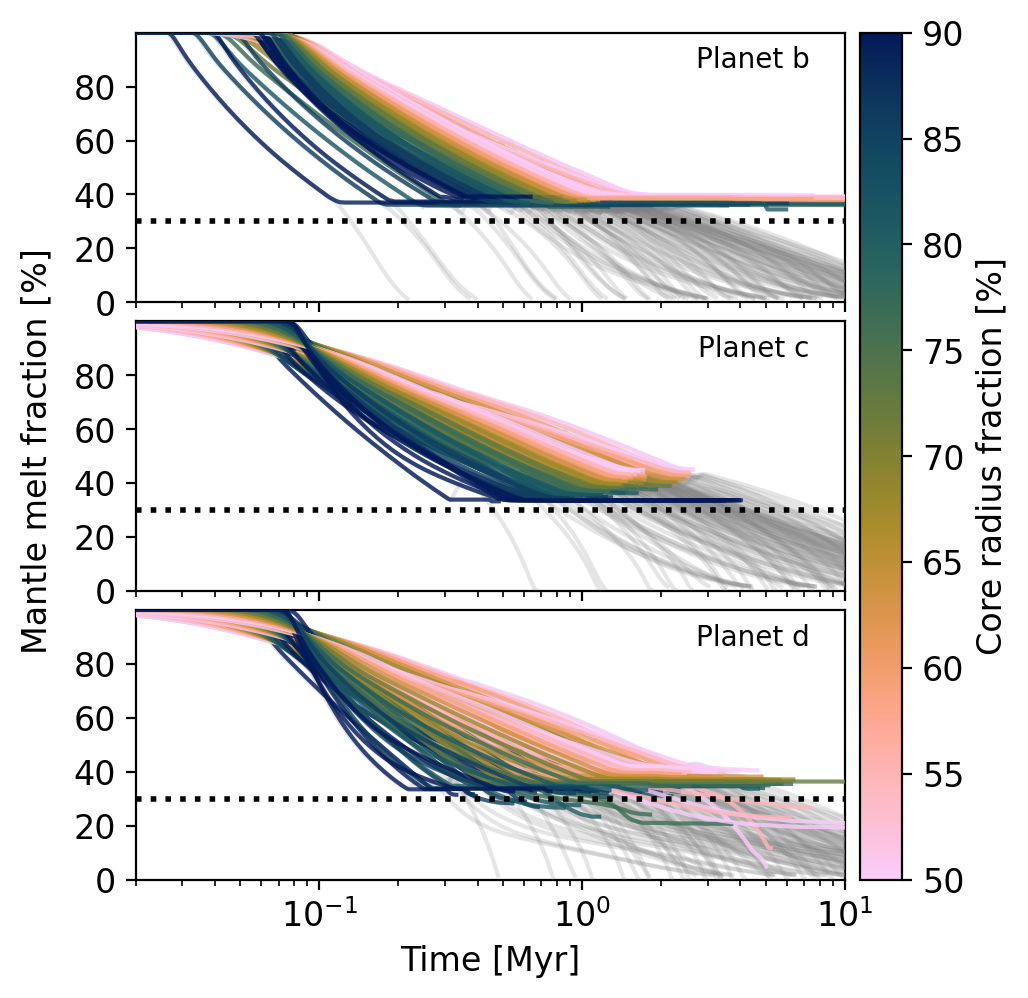

In [68]:
figscale = 1.1
fig, axs = plt.subplots(3,1, figsize=(5*figscale,5*figscale), sharex=True)

ykey = "Phi_global"
ylbl = "Global melt fraction [%]"
yscl = 100.0
ylim = (0,100)
dy   = 20

xkey = "Time"
xlbl = "Time [Myr]"
xscl = 1e-6

zvar = "struct.corefrac"
zscl = 100.0
zlbl = "Core radius fraction [%]"
cmap = cm.batlow_r

# get range of control variables
z_arr = []
for i in range(100):
    z = lg.descend_get(lov_b["conf"][i],zvar)
    z_arr.append(z*zscl)

cmap = cm.batlow_r
norm = mpl.colors.Normalize(vmin=np.amin(z_arr), vmax=np.amax(z_arr))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

lovs   = (lov_b,lov_c,lov_d)
nohs   = (noh_b,noh_c,noh_d)
lbls   = ("Planet b", "Planet c", "Planet d")
for i in range(len(lovs)):

    # NO TIDES
    helps = nohs[i]["helps"]
    for j in range(len(helps)):
        vals_x = helps[j][xkey][3:] * xscl
        vals_y = helps[j][ykey][3:] * yscl
        axs[i].plot(vals_x, vals_y, c='grey', alpha=0.2, zorder=3)

    # TIDES CASE
    helps = lovs[i]["helps"]
    for j in range(len(helps)):
        this_z = lg.descend_get(lovs[i]["conf"][j],zvar)*zscl
        vals_x = np.array(helps[j][xkey])[3:] * xscl
        vals_y = np.array(helps[j][ykey])[3:] * yscl
        plt_y = [vals_y[0]]
        for y in vals_y[1:]:
            plt_y.append(min(y, plt_y[-1]))
        axs[i].plot(vals_x, plt_y, c=sm.to_rgba(this_z), alpha=0.8, zorder=4)

    # DECORATE
    axt = axs[i].text(0.95, 0.95, lbls[i], zorder=12,
                horizontalalignment='right', verticalalignment='top', transform=axs[i].transAxes, fontsize=10)
    axt.set_bbox(dict(facecolor='white', alpha=0.5, linewidth=0))
    axs[i].axhline(30, color='k', ls='dotted', zorder=5, lw=2)
    axs[i].set_yticks(np.arange(ylim[0],ylim[1],dy))
    axs[i].set_ylim(ylim)

fig.supylabel("Mantle melt fraction [%]", fontsize=12)

cbar = fig.colorbar(sm, ax=axs, orientation='vertical')
cbar.set_label(zlbl)

axs[-1].set_xscale("log")
axs[-1].set_xlim(left=2e-2, right=10)
axs[-1].set_xlabel(xlbl, fontsize=12)
fig.subplots_adjust(hspace=0.07, right=0.77)

plt.show()
fig.savefig("output/evolve_all.pdf",bbox_inches="tight")